<a href="https://colab.research.google.com/github/pbarizza/ML-course-2025/blob/main/lesson05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 5#
**Machine leaning**

**05-Jul-2025**

In [283]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [284]:
df_train = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/test.csv')
df_gender = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/gender_submission.csv')

In [285]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [286]:
# Impute missing values for Age, Fare, Embarked
#df_train['Age'] = df_train.Age.fillna(df_train.Age.median())
#df_train['Fare'] = df_train.Fare.fillna(df_train.Fare.median())
#df_train['Embarked'] = df_train['Embarked'].fillna('S')
# encode non numberical data
#df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)

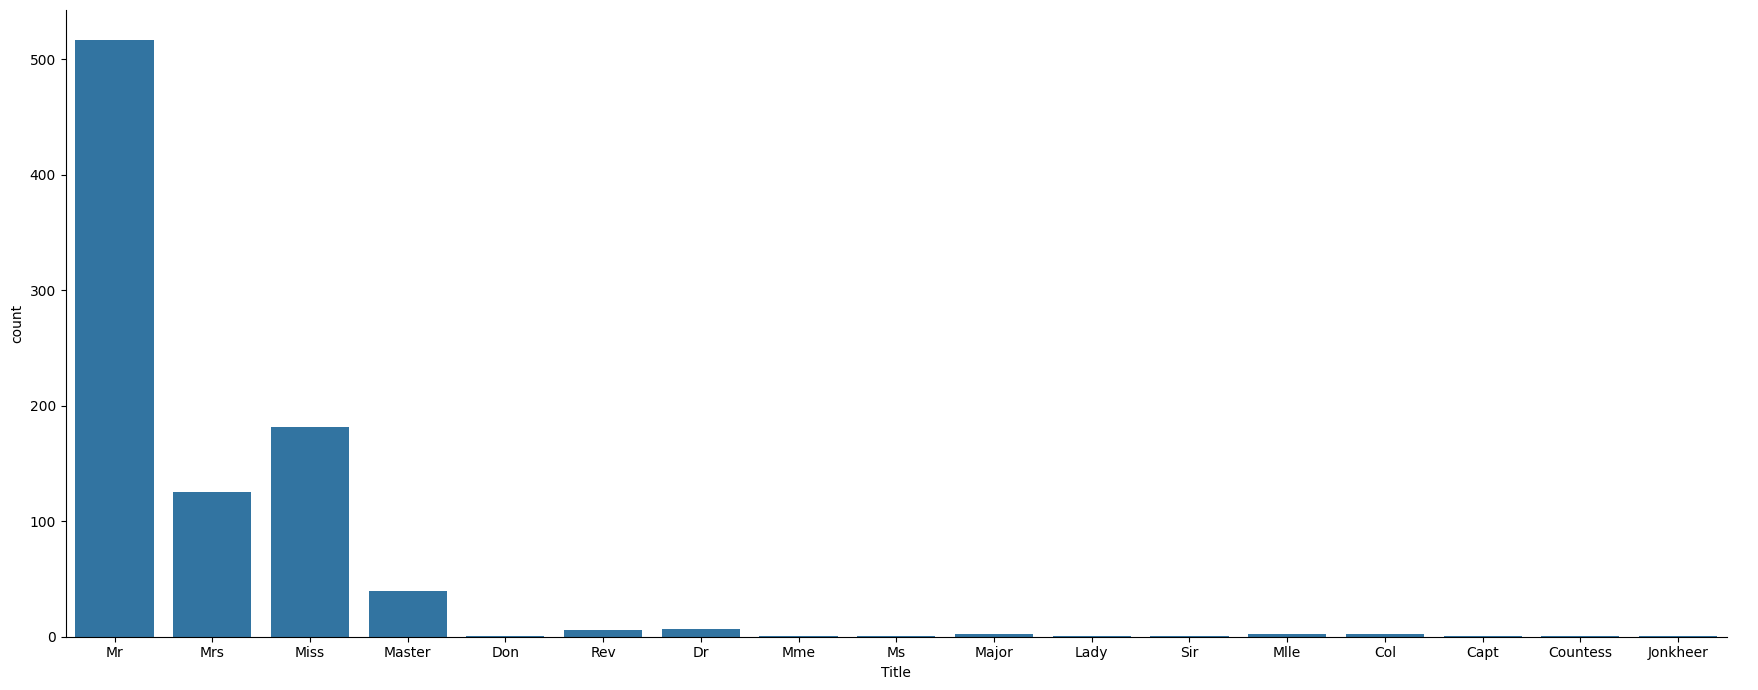

In [287]:
df_train['Name']
df_train['Title']  = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# encode Title with get_dummies
#df_train = pd.get_dummies(df_train, columns=['Title'], drop_first=True)
df_train['Title'].value_counts()
# cat plot title
sns.catplot(x='Title', kind='count', data=df_train, height=7, aspect=2.5)


In [288]:
# replace some of the title with 'rare'
df_train['Title'] = df_train['Title'].replace(['Mlle','Ms'],'Miss')
df_train['Title'] = df_train['Title'].replace(['Mme','Ms'],'Mrs')
df_train['Title'] = df_train['Title'].replace(['Capt','COl','Major','Rev','Jonkheer','Don','Sir','Countess','Lady','Dona'],'Rare')

In [289]:
# family size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [290]:
df_train['Fare'].head()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


In [291]:
# split fare into 4 bins
df_train['FareBin']=pd.qcut(df_train['Fare'],4,labels=False)
df_train['FareBin']

,FareBin
0,0
1,3
2,1
3,3
4,1
...,...
886,1
887,2
888,2
889,2


In [292]:
# groupby by farebin
df_train[['Fare','FareBin']]
df_train.groupby('FareBin')['Fare'].agg(['min','max','mean','median','std'])


,min,max,mean,median,std
FareBin,,,,,
0,0.0000,7.8958,7.034172,7.75000,1.946215
1,7.9250,14.4542,10.386050,9.84375,2.188359
2,14.4583,31.0000,23.028677,25.46670,5.093019
3,31.2750,512.3292,88.677872,69.55000,74.163197


In [293]:
# extract first letter from cabin
# note that NaN is extracted as 'n'
df_train['CabinLetter'] = df_train['Cabin'].astype(str).str[0]
df_train[['Cabin','CabinLetter']].head()

,Cabin,CabinLetter
0,NaN,n
1,C85,C
2,NaN,n
3,C123,C
4,NaN,n


In [294]:
# replace 'n' with 'U'
df_train['CabinLetter'] = df_train['CabinLetter'].replace('n','U')


In [295]:
#replace missing age with the median
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())


In [296]:
# replace missing embarc with 'S'
df_train['Embarked'] = df_train['Embarked'].fillna('S')


In [297]:
# replace Sex (male, female) with 0,1
#df_train['Sex'] = df_train['Sex'].replace(['male','female'],[0,1])

In [298]:
# encode with get_dummies with sex, embarked, title, cabinletter  (
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Title', 'CabinLetter'], drop_first=True)

In [299]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilySize', 'FareBin', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare', 'CabinLetter_B', 'CabinLetter_C',
       'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F', 'CabinLetter_G',
       'CabinLetter_T', 'CabinLetter_U'],
      dtype='object')

In [300]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [301]:
# split data
features = ['PassengerId', 'Survived', 'Pclass',  'Age', 'Parch',
       'FamilySize', 'FareBin', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare', 'CabinLetter_B', 'CabinLetter_C',
       'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F', 'CabinLetter_G',
       'CabinLetter_T', 'CabinLetter_U']
X = df_train[features]
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [302]:

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [303]:
confusion_matrix(y_test, y_pred)






array([[105,   0],
       [  0,  74]])

In [304]:
accuracy_score(y_test, y_pred)

1.0

In [305]:
precision_score(y_test, y_pred)

1.0

In [306]:
recall_score(y_test, y_pred)

1.0

In [307]:
f1_score(y_test, y_pred)

1.0

In [308]:
y_test_list = list(y_test)
y_pred_list = list(y_pred)
df_results = X_test.copy()
df_results['y_test'] = y_test_list
df_results['y_pred'] = y_pred_list

TP = TN = FP = FN = 0

for i, row in df_results.iterrows():
    actual = row['y_test']
    pred = row['y_pred']
    if actual == 1 and pred == 1:
        TP += 1
    elif actual == 0 and pred == 0:
        TN += 1
    elif actual == 0 and pred == 1:
        FP += 1
    elif actual == 1 and pred == 0:
        FN += 1

total = TP + TN + FP + FN
accuracy = (TP + TN) / total

y_probs = model.predict_proba(X_test)

y_probs = y_probs[:, 1]

for t in [0.2, 0.4, 0.5, 0.6, 0.8]:
    y_pred_t = (y_probs >= t).astype(int)
    print(f"--- Threshold: {t} ---")
    print(confusion_matrix(y_test, y_pred_t))

--- Threshold: 0.2 ---
[[105   0]
 [  0  74]]
--- Threshold: 0.4 ---
[[105   0]
 [  0  74]]
--- Threshold: 0.5 ---
[[105   0]
 [  0  74]]
--- Threshold: 0.6 ---
[[105   0]
 [  0  74]]
--- Threshold: 0.8 ---
[[105   0]
 [  0  74]]


In [309]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr

array([0., 0., 0., 1.])

In [310]:
tpr

array([0.        , 0.01351351, 1.        , 1.        ])

In [311]:
thresholds

array([           inf, 9.98970990e-01, 8.61162726e-01, 7.07271388e-04])

In [281]:
auc_score = roc_auc_score(y_test, y_probs)
auc_score

np.float64(1.0)

In [279]:
# Youden's J = TPR - FPR
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]
print("Best Threshold:", best_threshold)

Best Threshold: 0.8611627256400727


Text(0.5, 1.0, 'ROC Curve with Threshold Annotations')

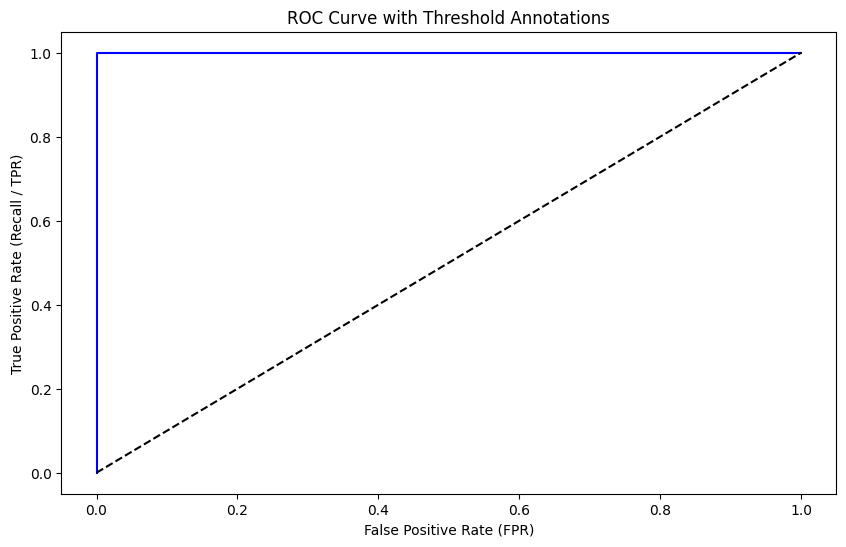

In [280]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (Recall / TPR)')
plt.title('ROC Curve with Threshold Annotations')

In [326]:
df_test = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/test.csv')
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [333]:
df_test['Title']  = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Title'].replace(['Mlle','Ms'],'Miss')
df_test['Title'] = df_test['Title'].replace(['Mme','Ms'],'Mrs')
df_test['Title'] = df_test['Title'].replace(['Capt','COl','Major','Rev','Jonkheer','Don','Sir','Countess','Lady','Dona'],'Rare')
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['FareBin']=pd.qcut(df_test['Fare'],4,labels=False)
df_test['CabinLetter'] = df_test['Cabin'].astype(str).str[0]
df_test['CabinLetter'] = df_test['CabinLetter'].replace('n','U')
#df_test['Embarked'] = df_test['Embarked'].fillna('S')
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Title', 'CabinLetter'], drop_first=True)

df_test.columns


KeyError: "['Sex', 'Embarked'] not in index"

In [ ]:
# X0test)final.columns
# X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)

In [ ]:
features = ['PassengerId', 'Pclass',  'Age', 'Parch',
       'FamilySize', 'FareBin', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare', 'CabinLetter_B', 'CabinLetter_C',
       'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F', 'CabinLetter_G',
       'CabinLetter_T', 'CabinLetter_U']
X = df_test[features]

In [ ]:
# Predict using trained model
X_submission = df_test[features]
y_submission = model.predict(X_submission)

In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_submission
})